# Binary Classification of Subscriptions for Direct Marketing Campaigns: A Logistic Regression & Random Forest Approach
### Author: Georgios Spyrou (georgios.spyrou1@gmail.com)
### Completion Date: 24/08/2020

<img src="../project_picture.jpg" style="vertical-align:middle;margin:0px 0px">

## Project Description

In this project we are going to analyze a dataset containing information about marketing campaigns that were conducted via phone calls from a Portuguese banking institution to their clients. Purpose of these campaigns is to prompt their clients to subscribe for a specific financial product of the bank (term deposit). After each call was conducted, the client had to inform the institution about their intention of either subscribing to the product (indicating a successful campaign) or not (unsucessful campaign).

Our main task in this project is to create effective machine learning algorithms that are able to predict the probability of a client subscribing to the bank's product. We should note that, even though we are talking about calculating probabilites, we will create classification algorithms - meaning that the final output of our models will be a binary result indicating if the client subscribed ('yes') to the product or not ('no').

The dataset has 41188 rows (instances of calls to clients) and 21 columns (variables) which are describing certain aspects of the call. Please note that there are cases where the same client was contacted multiple times - something that practically doesn't affect our analysis as each call will be considered independent from another even if the client is the same. 

### Description of the features

The predictor variables (features) contained in the dataset can be divided into the following five sections:

1. Variables that describing attributes related directly to the client:

    a. **age** <br>
    b. **job**: type of job (e.g. 'admin', 'technician', 'unemployed', etc) <br>
    c. **marital**: marital status ('married', 'single', 'divorced', 'unknown') <br>
    d. **education**: level of education ('basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown','university.degree','illiterate') <br>
    e. **default**: if the client has credit in default ('no', 'unknown', 'yes') <br>
    f. **housing**: if the client has housing a loan ('no', 'unknown', 'yes')<br>
    g. **loan**: if the client has a personal loan ? ('no', 'unknown', 'yes')<br>
    <br>
2. Variables related to the last contact of the current campaign:

    a. **contact**: type of communication ('telephone', 'cellular') <br>
    b. **month**: month of last contact <br>
    c. **day\_of\_week**: day of last contact <br>
    d. **duration**: call duration (in seconds) <br>
    <br>
3. Other variables related to the campaign(s):

    a. **campaign**: number of contacts performed during this campaign and for this client <br>
    b. **pdays**: number of days passed by after the client was last contacted from a previous campaign <br>
    c. **previous**: number of contacts performed before this campaign and for this client <br>
    d. **poutcome**: outcome of previous marketing campaign ('nonexistent', 'failure', 'success') <br>
    <br>   
4. Socioeconomic variables:

    a. **emp.var.rate**: employement variation rate - quarterly indicator <br>
    b. **cons.price.idx**: consumer price index - monthly indicator <br>
    c. **cons.conf.idx**: consumer confidence index - monthly indicator <br>
    d. **euribor3m**: euribor 3 month rate - daily indicator <br>
    e. **nr.employed**: number of employees - quarterly indicator <br>
      
Of course, the dataset also containts the variable **subscribed** which is the target variable for our project, indicating if the client subscribed to the product (_'yes'_) or not (_'no'_).

Now that we got a brief understanding of what the project is about, what variables the dataset contains and what is the primary goal, we can start with the main part of our analysis. At the first part of this project we will perform all the regular operations needed in pretty much any data science project: load the dataset into a dataframe, search for corrupt/inaccurate records & perform data cleaning operations, and finally perform exploratoty data analysis to identify interesting patterns in the data that might be useful when creating the machine learning algorithms.

## Part 1 - Data Import, Cleaning and Exploratory Data Analysis (EDA)

First step is to import the relevant libraries that we will use across the whole project, set the project directory where all files are located and load our dataset into a dataframe.

In [42]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

sns.set_style("dark")

Project set-up and data loading:

In [43]:
# Location of the project folder and the dataset (csv file)
project_folder = r'C:\Users\george\Desktop\FCA_Project'

os.chdir(project_folder)

data_file_loc = os.path.join(project_folder, 'data set.csv')

bank_marketing_df = pd.read_csv(data_file_loc, sep=';', header=[0])

In [44]:
bank_marketing_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

We can observe that the last column of the dataset ('y') is our target variable which indicates if a client ended up subscribing to the product or not. The initial name from the dataset is not very self-explanatory so we will rename it to something more relevant.

In [45]:
bank_marketing_df.rename(columns={'y': 'subscribed'}, inplace=True)

#### Data Cleaning

In every data science project (and in general when working with data) before we perform any type of data analysis or create prediction models it's very important that we make sure that the dataset is "clean". When calling a dataset clean, we generally mean that we have handled any cases where we had missing values (the might come in the form of NULL if the value is missing or with other types like 'unknown'), get rid of duplicate rows as they do not add any value and they just increase the dimension of the data, if working with text we usually check for mispelled words, etc.

In general, the data cleaning steps are very important for every project, as we want to make sure that our dataset has the best possible shape before we build any model around it. That said, there is no specific steps that we need to take for data cleaning and it's something that the data analyst/scientist should adjust depending on the dataset that they are working with and the specific problem that they are trying to tackle.

In [46]:
# Check if the dataframe has duplicates and remove them
df_shape = bank_marketing_df.shape
print(f'There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset')

There are 41188 rows and 21 columns in the dataset


In [47]:
bank_marketing_df = bank_marketing_df.drop_duplicates()
df_shape = bank_marketing_df.shape
print(f'''There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset after removing duplicates''')

There are 41176 rows and 21 columns in the dataset after removing duplicates


Above we can see that we have removed 12 rows from the initial dataset as they were duplicates of other rows and they did not give us any additinal information that we didn't have already.

In [48]:
# Identify how many missing values we have per column
bank_marketing_df.isnull().sum(axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

Our check for missing values indicates that all of our rows/columns are fully populated (i.e. no NULL values). That said, this does not mean that we don't have any missing values in another format. For example - as we are going to see below - there are many cases where for specific columns there are instances taking the value 'unknown', indicating that we do not know the value.

In [49]:
# There are many missing values in other forms like 'unknown'
unknown_cols = bank_marketing_df.isin(['unknown']).sum(axis=0)
unknown_cols[unknown_cols > 0]

job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

For the time being, we will leave these columns as they are and we won't proceed with imputation methods in order to infer what the values would be. This is something that we might want to do in future iterations of the project, by using cross-tabulation methods to 'guess' what the unknown value would be based on the columns that are populated.

#### Exploratory Data Analysis

At first we can have a look at the distribution of the target variable ('subscribed') across the whole dataset, to identify any interesting patterns.

In [50]:
def visualizeCategoricalVar(input_df: pd.core.frame.DataFrame, col: str, hue: str, figsize=(10, 8)) -> None:
    """
    Plot the number of subscribed clients for a specified categorical column
    of a dataframe.

    Input:
    ----
        input_df: Dataframe that contains the dataset
        col: Column of the dataframe that will be used by the countplot
        hue: Column for which to split the dataset in terms of color
    Returns:
    ------
        Countplot of the specified variable splitted by the different classes in 'hue'
    """
    size = float(input_df.shape[0])

    plt.figure(figsize=figsize)
    ax = sns.countplot(x=col, data=input_df, hue=hue)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
    if hue is None:
        plt.title('Number of Subscribed Clients', fontweight='bold')
    else:
        plt.title(f'Number of Subscribed Clients per \'{col}\'', fontweight='bold')
    plt.grid(True, alpha=0.3, color='black')
    plt.legend(loc='best')
    plt.show()

No handles with labels found to put in legend.


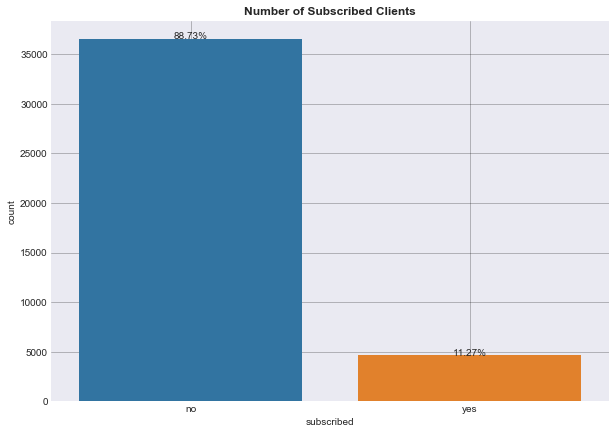

In [51]:
visualizeCategoricalVar(bank_marketing_df, col='subscribed', hue=None, figsize=(10, 7))

We can observe that the dataset is **highly imbalanced** towards the clients who did not subscribe for the product, as for approximately 89% of the clients the product campaign was not successful. Class imbalance is an important attribute of our dataset and we have to be careful both in the way that we are going to develop our prediction models, as well as the evaluation metrics that we will pick to measure how accurate the classifiers are. For example in our case (and in any case where we have class imbalance) we could not bick accuracy as a performance metric because the results would be misleading - but more on the evaluation metrics later in the project.

Now back to the EDA analysis, we will initially focus on the **categorical** variables (i.e. variables that can take limited/fixed number of possible values and they usually represent groups/labels). Please note that we will present only the categorical variables that appeared to give us significant or interesting results - the rest have been omitted from this notebook.

##### $job$

Seems to be a good predictor for the machine learning algorithms to identify who subscribed for the product. For example we can see that the admin & technician jobs appear to be the ones that tend to subscribe more compared to the rest of the professions. Another interesting finding is that almost 1 out of 3 clients who are being contacted are students, and they actually end up subscribing to the bank's product.

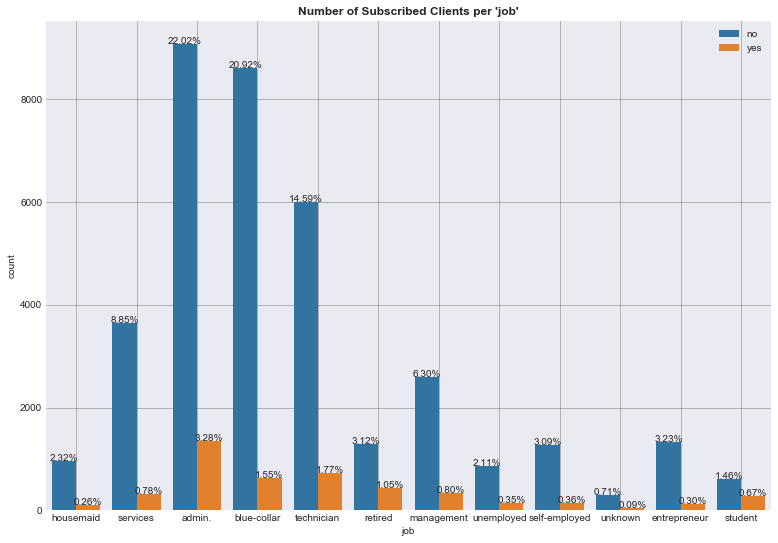

In [52]:
visualizeCategoricalVar(bank_marketing_df, figsize=(13, 9), col='job', hue='subscribed')

##### $education$

People with higher education (university degree) or high school diploma appear to be more prompt to subscriptions. This can be likely because a university degree and higher education might lead to jobs with higher salaries and thus people are more prompt to invest money to non-essential products and services, like the one the bank was offering.

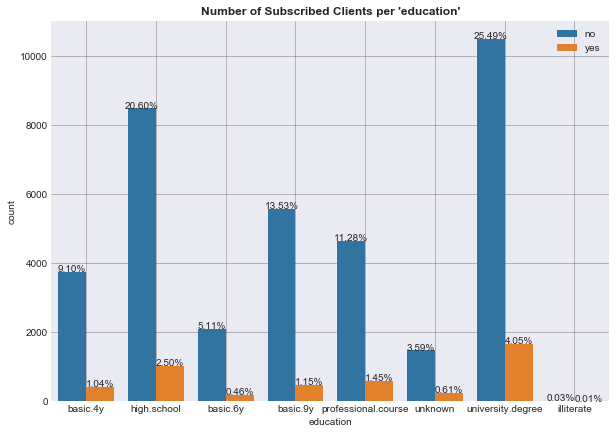

In [53]:
visualizeCategoricalVar(bank_marketing_df, figsize=(10, 7), col='education', hue='subscribed')

##### $poutcome$

For most of the customers in the dataset, it's the first time that they are being contacted. Interesting is that customers who subscribed during the previous campaign, they tend to re-subscribe. Thefefore this variable might be a strong predictor for the target variable.

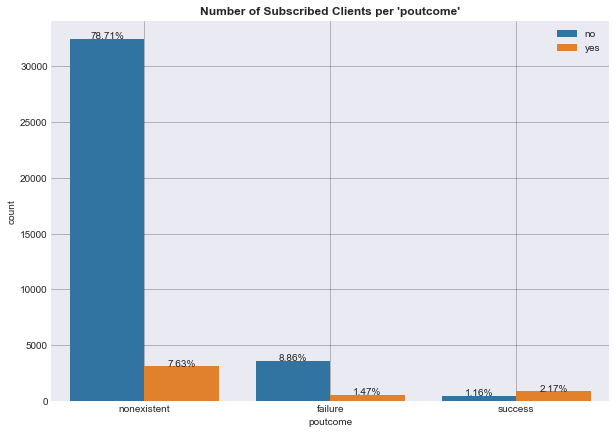

In [54]:
visualizeCategoricalVar(bank_marketing_df, figsize=(10, 7), col='poutcome', hue='subscribed')

Therefore, after we have explored all of the categorical variables of our dataset, we ended up presenting only 'job', 'education' and 'poutcome', as they appear to be the strongest predictor variables for our prediction tasks.

Below we will focus at performing exploratory data analysis for the **numerical** variables (i.e. variables that are representing quantities/numbers).

In [55]:
summary_num_vars = bank_marketing_df.describe()
summary_num_vars

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Some observations from the summary table for the numerical variables:

- **$age$**: The target group of the campaings appears to be the people with age range between 30-50 years old - most likely indicating that the bank was targeting people that have finished their studies and are now actively working
- **$pdays$**: The majority of the data has the value ‘999’, indicating that most of the clients were not previously contacted from another campaign
- **$duration$**: The majority of the calls last between 1 and 5 minutes. Interesting is that the calls that belong to the last quartile contains lasted -significantly- longer than the average



In [56]:
def visualizeNumericalVar(input_df: pd.core.frame.DataFrame, col: str, hue: str, figsize=(10, 8)) -> None:
    """
    Generate a Boxplot and a Histogram for a numerical variable.

    Input:
    ----
        input_df: Dataframe that contains the dataset
        col: Column of the dataframe that will be used by the boxplot/histogram
        hue: Column for which to split the dataset in terms of color
    Returns:
    ------
        Boxplot and overlapping histograms of the specified variable, splitted by the different classes in 'hue'
    """
    box_pal = {"no": "darkcyan", "yes": "firebrick"}

    fig, ax = plt.subplots(1, 2, figsize=(10, 8))
    # Boxplot
    sns.boxplot(data=input_df, x=hue, y=col, palette=box_pal,
                ax=ax[0]).set(title=f'Boxplot for \'{col}\'')
    # First Histogram
    sns.distplot(input_df[input_df[hue] == 'no'][col], color='darkcyan',
                 fit=norm, fit_kws={'color': 'darkcyan'},  kde=False,
                 ax=ax[1]).set(title=f'Histogram of \'{col}\'')
    # Second Histogram
    sns.distplot(input_df[input_df[hue] == 'yes'][col], color='firebrick',
                 fit=norm, fit_kws={'color': 'indianred'}, kde=False,
                 ax=ax[1]).set(title=f'Histogram of \'{col}\'')

    ax[0].grid(True, alpha=0.1, color='black')
    ax[1].grid(True, alpha=0.1, color='black')
    fig.show()

###### $age$
From the plot below we can observe that:

- Median age is around 37-40 years old, and that is the case for both for clients who subscribed ('yes) and clients who didn't (no)
- We can quickly observe the presence of a few outliers - but in reality are just people who belong to a higher age group, and therefore are still relevant in our analysis
- There is a big overlap between subscribed/not subscribed clients when comparing the data for the interquartile range (i.e. data that fall between quartile Q1 and Q3)
- The first quartile(Q1) appears to be almost the same for both classes.On the other hand, the last quartile(Q4) is slightly broader in favor of customers who subscribed



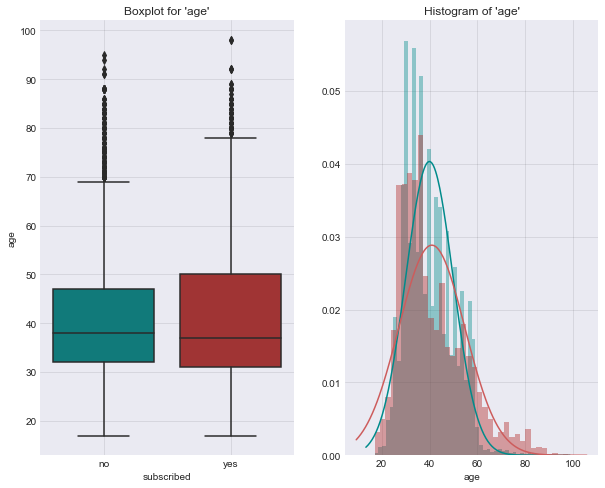

In [57]:
visualizeNumericalVar(input_df=bank_marketing_df, col='age', hue='subscribed', figsize=(12, 10))

#### Correlation

Now it would be interesting to explore the case that some of the numerical variables in the dataset might be highly correlated - something that would imply that we have variables that do not provide much additional information as the required information is already been captured from another variable(s). As a reminder, _correlation_ is a statistical measure that indicates the extend to which two or more variables fluctuate together, and it a _normalized_ version of the covariance -  a statistic that indicates the tendency (sign) of a linear relationship between to variables but lacks in showing the magnitute of this relationship. 

Thus, we will calculate the correlation of the variables and present the results with a pairplot (pairwise relationship between variables) as well as a heatmap of the **Pearson Correlation Coefficients** (PCC). PCC is a statistic that measures the  linear correlation between two variables and it takes values from -1 (strong negative correlation) to +1 (strong positive correlation). If the PCC has value of 0, then this indicates that there is no correlation between the variables.The connection between covariance and the Pearson correlation coefficient is being describred in the following formula:

$${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$

where ${cov} (X,Y)$ is the covariance between two variable $X$ and $Y$, and $\sigma _{X}$, $\sigma _{Y}$ are their standard deviations.

<Figure size 1296x1008 with 0 Axes>

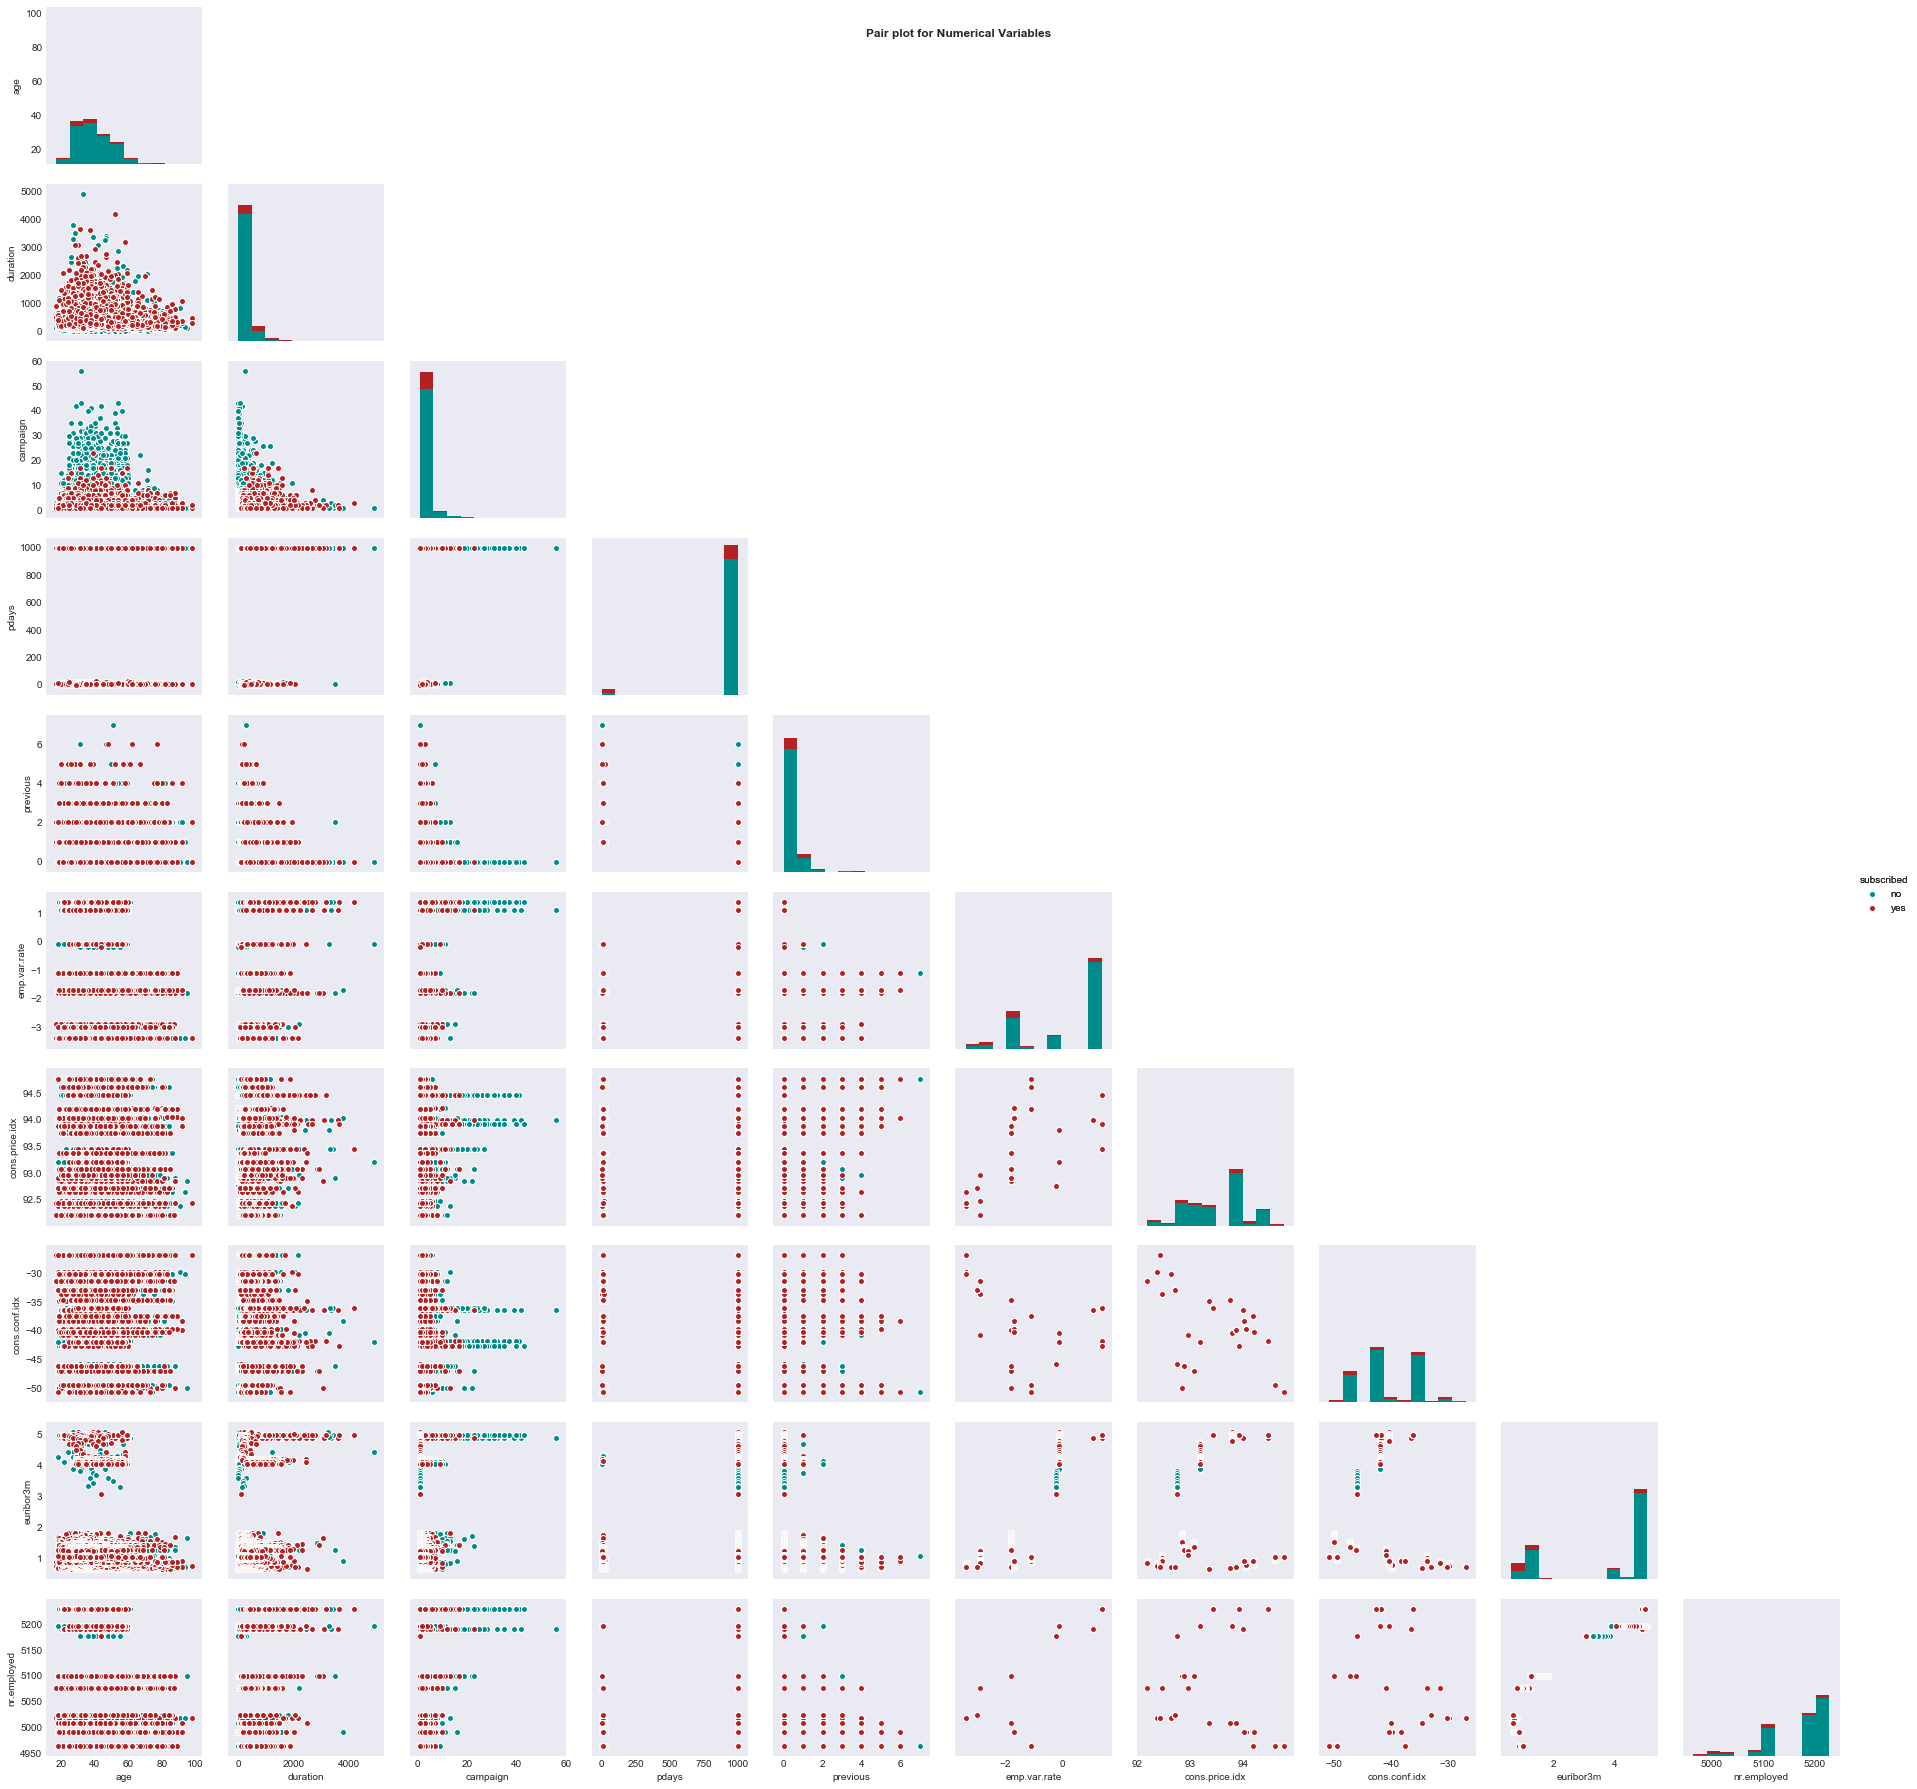

In [58]:
summary_num_vars = bank_marketing_df.describe()

def hide_upper_triangle(*args, **kwds):
    plt.gca().set_visible(False)

# Pairplot
plt.figure(figsize=(18, 14))
pair_plt = sns.pairplot(data=bank_marketing_df, vars=summary_num_vars.columns,
                        hue='subscribed', diag_kind='hist',
                        palette={"no": "darkcyan", "yes": "firebrick"})
pair_plt.map_upper(hide_upper_triangle)
pair_plt.add_legend()
pair_plt.set(alpha=0.5)
pair_plt.fig.suptitle('Pair plot for Numerical Variables', fontweight="bold")
plt.show()

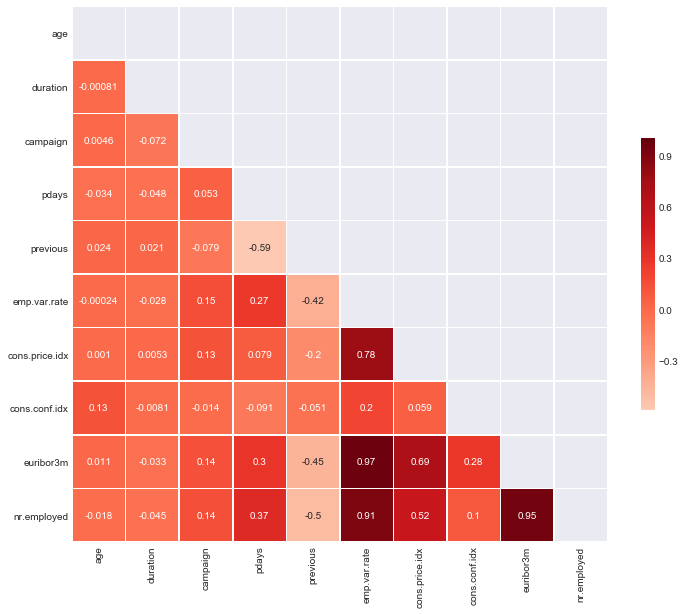

In [59]:
# Calculate the Pearson Correlation Coefficients
corr = bank_marketing_df[summary_num_vars.columns].corr()

# Heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='Reds', vmax=1.0, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The values in the Heatmap above represent the value of the Pearson Correlation Coefficients between each pair of variables. From the above we can infer that the pairs of variables in the socioeconomic group of features (i.e., emp.var.rate, cons.price.idx, euribor3m, nr.employed ) appear to be highly correlated with each other. On the other hand, the rest of the pairs do not indicate the presence of high correlation.

## Part 2 - Data Preprocessing

Now that we have finished the EDA part of the project - and before we move to the fun part (i.e. modelling) - we will have to make any necessary adjustments to our dataset so that it can have the right format that would fit nicely into our machine learning algorithms. Specifically, we are going to:

1. Transform the 'pday' column into separate buckets
2. re-map the values of the target variable from 'yes' and 'no' to 1 and 0 respectively
3. Use one-hot encoding at the categorical variables (i.e. transform them to numerical variables or more accurately to binary variables)
4. Normalize the numerical variables using the Min-Max feature scaling method
5. Split the dataset into training and test samples

Therefore we can start with with point 1. As a reminder, earlier in the project we saw that the values of 'pday' feature tend to have the value '999'. Specifically out of the 41176 distinct cases, 39661 of them had this value which indicates that the client has not been contacted previously from another campaign. To tackle this issue, we will create new 'buckets' (i.e. groups) based on this variable, representing the amount of days that have passed since the client has been contacted from another campaign. The split is following the logic below:

- '0': Never contacted before from another campaign
- '1': Contacted during the previous week (0 to7 days)
- '2': Contacted the week before 1 (8 to 14 days)
- '3': Contacted the week before 2 (15 to 21 days)
- '4': Contacted more than 21 days ago


In [60]:
def bucketPday(pday_val):
    """
    Split the pday feature into 5 different buckets, depending on how many days
    (if any) have passed since they last contacted from a previous campaign.
    The bucket measures the number of weeks passed since the last contact.
    """
    if pday_val == 999:
        return 0
    elif (pday_val >= 0) and (pday_val <= 7):
        return 1
    elif (pday_val >= 8) and (pday_val <= 14):
        return 2
    elif (pday_val >= 15) and (pday_val <= 21):
        return 3
    else:
        return 4

In [61]:
bank_marketing_df['pdays_bucket'] = bank_marketing_df['pdays'].apply(lambda x: bucketPday(x))

In [62]:
bank_marketing_df['pdays_bucket'].value_counts()

0    39661
1     1177
2      276
3       56
4        6
Name: pdays_bucket, dtype: int64

In [63]:
# Drop the column 'pdays' as we do not need it anymore
bank_marketing_df.drop(columns=['pdays'], inplace=True)

In the next step we map the values from the target variable from 'yes' and 'no' to 1 and 0, as follows:

In [64]:
# Transform the 'yes' and 'no' values (target variable) to 1 and 0 respectively
bank_marketing_df['subscribed'] = bank_marketing_df['subscribed'].map({'yes': 1, 'no': 0})

Next step of the pre-processing part is to **encode** the categorical features of the dataset. This is necessary as most of the algorithms do not work well with categorical (i.e. text) data, and we need a way to make the computer to understand the categories as represented by numbers - while also making sure that we are preserving the characteristics of these cetegorical features.

In this project we will use the **one-hot encoding** method, as we can not map our values directly to integers because that would imply we are assuming that there is a natural ordering in the values/labels - something that's not the case. One-hot encodning is creating a binary representation for the labels by transforming the labels into separate columns and assign to them the value 1 when the label represents the true category and 0 elsewhere.

In [65]:
categorical_cols = bank_marketing_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [66]:
encoded_df = pd.concat([bank_marketing_df, pd.get_dummies(bank_marketing_df[categorical_cols])], axis=1)

In [67]:
encoded_df = encoded_df.drop(categorical_cols, axis=1)
encoded_df.head(5)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


Following the encoding of the categorical features, we will continue with the **normalization (scalling)** of the numerical features. Note that this is a step that is not necessary for all algorithms. If our machine learning model is rule based (for example the tree based algorithms) then there is no requirement for data scalling/normalization. On the other hand, when we are using distance based algorithms, then it's important to normalize the data - as if we don't then the algorithms will tend  to favor the features that have high scales compared to smaller ones. 

For this project we will use the **MinMax scalling** method to normalize our numerical features and bring them in the range [0,1], by using the following formula:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

In [68]:
# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
encoded_scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

Final step of the preprocessing part, is to **split the dataset into training and test sets**.

In [69]:
# Split the data to train and test sets
X = encoded_scaled_df.loc[:, encoded_scaled_df.columns != 'subscribed']
y = encoded_scaled_df['subscribed']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
y_train.value_counts()

0.0    29272
1.0     3668
Name: subscribed, dtype: int64

In [72]:
y_test.value_counts()

0.0    7265
1.0     971
Name: subscribed, dtype: int64

We can see that in both of the training and test sets, the number of clients who subscribed are approximatelly 12% of the overall amount of contacted clients.

## Part 3 - Model Evaluation Metrics

#### Recall & Precision

Before moving into creating the classification models, we have to decide **how** we are going to evaluate our model's perfomance. Remember that as we saw above, the dataset is suffering from high imbalance between the labels - as most of the dataset is in favor of clients who did not subscribe for the bank's product. 

Therefore, a metric like classification accuracy would be a poor choice as it would achieve a high accuracy score due to correctly predicting the majority class, but perform poorly on predicting the minority class. Thus, for our project we are going to use two other **threshold** metrics (i.e. metrics that quantify the classification prediction errors), which are focusing on predicting the 'smaller' positive class:  
1. **Recall** : The ratio of correct positive predictions to the overall number of positive **examples**
2. **Precision**: It's the ratio of correct positive predictions to the overall number of positive **predictions**

To get a better understanding of these two metrics, we should first talk about the confusion matrix. The confusion matrix is nothing more than a matrix which represents how many classes we classified correctly or not, which are the classes that we classified correctly/misclassified and what type of errors we made. For a binary classification case, like the one we are facing in our project, the confusion matrix would have the following format:

| | **Predicted** |
---|--- | --- | ---
| |**Not Subscribed** | **Subscribed**
**Expected**|**Not Subscribed** | True Negative | False Positive
|**Subscribed** | False Negative | True Positive

Based on the table above, we can compute the Recall and Precision as follows:

$$ Recall = \frac{TP}{TP + FN}$$

and 

$$ Precision = \frac{TP}{TP + FP}$$

We should have in mind that, in practice, we usually have to find a balance between Precision and Recall as when focusing to increase one of them then we are decreasing the other. We can compute the confusion matrix, the values for Recall/Precision and plot a heatmap of the results by using the custom function below:

In [32]:
def getModelEvaluationMetrics(classifier, model_name: str, x_test: pd.core.frame.DataFrame,
                              y_test: pd.core.frame.DataFrame, y_predicted, plot_confusion_matrix=False,
                              figsize=(10, 8)) -> np.ndarray:
    """
    Calculate the Precision and Recall of a classifier. Return the results
    as a matrix with the scores, as well as a Confusion Matrix plot.
    """
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n\n {0}'.format(conf_mat))

    if plot_confusion_matrix:
        labels = ['no', 'yes']
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.title(f'Confusion Matrix for {model_name}', fontweight='bold')
        plt.show()

    # Calculating the precision (tp/tp+fp)
    precision = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                              conf_mat[0][1])) * 100, 2))
    print('The precision is: {0} %'.format(precision))

    # Calculating the recall (tp/tp+fn)
    recall = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                           conf_mat[1][0])) * 100, 2))
    print('The recall is: {0} %'.format(recall))

    return conf_mat

#### Receiver Operating Characteristics (ROC) Curve

Except the two *threshold* evaluation metrics presented above, we are going to use an additional *rank* metric (i.e. metrics that are focused at evaluating classifiers based on how effective they are at separating classes) called **Receiver Operating Characteristics (ROC)** Curve. The ROC curve is being used as it's a more 'general' evaluation method, giving equal weight to both classes. 

A ROC curve is a  plot which summarizes the behavior of a model by calculating the **False Positive Rate(FPR)** and **True Positive Rate(TPR)** under different thresholds, where:

$$False\,Positive\,Rate = \frac{FP}{FP + TN}$$

and 

$$True\,Positive\,Rate = \frac{TP}{TP + FN}$$

When plotting the ROC Curve we want our classifier to fall into the top left corner of the graph, with TPR close to 1 and FPR close to 0. Based on the ROC Curve we then calculate the **ROC Area Under the Curve (ROC AUC)** to quantify the performace of our classification model (more here: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve).

We can perform a full ROC analysis (ROC Curve + calculating of the ROC AUC score) by using the following function:

In [33]:
def createROCAnalysis(classifier, model_name: str, y_test: pd.core.series.Series, pred_probs: np.ndarray,
                      plot_ROC_Curve=False, figsize=(10, 8)) -> int:
    """
    Perform a ROC-AUC analysis for a specified classifier.

    Args:
    -----
        classifier: Model based on which we perform the ROC analysis.
        model_name: Name of the model (e.g. 'Logistic Regression')
        pred_probs: Predicted probabilites for each instance/class
        plot_ROC_Curve: Plot the ROC Curve against a random model

    Returns:
        The Area Under Curve (AUC) score for the specific classifier
    """
    if plot_ROC_Curve:
        plt.figure(figsize=figsize)
        plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier')
        fp_rate, tp_rate, _ = roc_curve(y_test, pred_probs[:, 1])
        plt.plot(fp_rate, tp_rate, marker='.', label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}', fontweight='bold')
        plt.grid(True, alpha=0.1, color='black')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate Area Under Curve (AUC) for the Receiver Operating
    # Characteristics Curve (ROC)
    auc_score = np.round(roc_auc_score(y_test, pred_probs[:, 1]), 4)
    print(f'{model_name} - ROC AUC score: {auc_score}')

    return auc_score

## Part 4 - Classification Models

And now the fun part. At this stage of the project, we have familiarized ourselves with the dataset and the features, applied any necessary data cleaning and transformation, we splitted the dataset into training and test sets and introduced that model evaluation methods that we will use to access the performance of our classifiers. In the first version of this project we will work with two machine learning algorithms for classification: **1) Random Forests** and **2) Logistic Regression**.

Initially we will use the whole dataset (20 features) to predict whether a client will end up subscribing to the bank's product or not, via the usage of a Random Forest algorithm. After evaluating the performance of this model, we will pick the best 5 features that appear to be the best predictors of the target variable, create a new Logistic Regression model and evaluate it's performance. Finally, we will compare these two algorithms and attempty to identify interesting results and/or patterns.

## Random Forests

Random Forests is a very well-known and powerful ensemble learning method used both for classification and regression, and it's based based on Decision Trees. Practically, the random forest algorithm is creating multiple decision trees - using a different combination/subset of the features each time - and makes a prediction (vote) based on this subset. The individual decision trees are considered weak learners and they suffer from high variance, but all together create a strong and robust prediction model with high generalization performance.

In more details, the **Random Forest** algorithm works as follows:

1. We randomly choone $n$ samples with replacement from the training set (boostrap sample)
<br/><br/>
2. Create a decision tree based on this bootstrap sample, and at each node:

    a. Randomly select $m$ amount of features without replacement 

    b. Split the node based on the feature that gives us the best split based on some criterion - usually we are trying to maxime the Information Gain
<br/><br/>
3. We repeat the steps 1 and 2 $k$ times, where k is the number of trees that we choose to create before we make a decision. At the end of each of the $k$ iterations, the decision tree will make a "vote" (predicted label for classification or value for regression).
<br/><br/>
4. Finally, we aggregate the votes received from all of the decision trees and we pick the classification having the most votes among all the trees. Note that if we are facing a regression problem, then the random forest will pick the average of the outputs of the trees.

Pros:
1. Easy to use and tune algorithm
2. Provides reliable feature importance estimates
3. Robust to outliers, as well as overfitting

Cons:
1. Computationally expensive
2. More complex to visualize and understand compared to Decision Trees

Now we can start creating the Random Forest classifier. At the beggining we will create a parameter grid for which we will try different values for the hyperparameters used in the Random Forest algorithm and find the combination that is producing the best results. 

This is a necessary step, as compared to the parameters of the model that are being learned by the model itself (in the case of the Random Forest that would be the variables and the thresholds used to split a node) the hyperparameters need to set up from the data scientist/analyst who is creating the model. In practice there are no rules on what values these hyperpatameters should take and it's usually a task that requires experimentation and time. We will tune the algorithm for the following:

- __bootstrap__: Indicate if we want to sample with replacement or not
- __max_features__: Maximum number of features considered for splitting a node
- __min_samples_leaf__: Minimum number of data points allowed in a leaf node.A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.
- __min_samples_split__: Minimum number of data points placed in a node before the node is split
- __n_estimators__: Number of trees created before we take the average(regression) or the mode(classification)

In [34]:
# Instantiate the Random Forest model
rf_class = RandomForestClassifier()

In [49]:
# Set the parameter grid for the Random Forest Classifier
param_grid = {
    'bootstrap': [True], 
    'max_features': ['sqrt', 6, 10],
    'min_samples_leaf': [20, 30, 40],
    'min_samples_split': [15, 20, 25],
    'n_estimators':  [400, 500, 600]
}

In [50]:
# Tune the model by finding the best hyperparameters
rf_grid_search = GridSearchCV(estimator=rf_class, scoring=['roc_auc'],
                              refit='roc_auc', param_grid=param_grid, cv=10,
                              n_jobs=-1, verbose=10)

In [ ]:
# Fit the Random Forest model based on the best parameters
rf_grid_search.fit(X_train, y_train)

We can see that after tuning the model to identify the optimal hyperparameters we end up with the following model:

In [55]:
rf_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The model is now in position to make predictions on data that it has not seen before (test data in our case). The *predict_proba* method will return a list of lists of the form $[p_0, p_1]$ where 
- $p_0$ : Probability to belong to class 'no'  (i.e. not subscribed) 
- $p_1$ : Probability to belong to class 'yes' (i.e. subscribed) 

For each separate instance, we will assign the value '0' (not subscribed) if $p_0$ > $p_1$ or we will assign the value '1' (subscribed) if $p_1$ > $p_0$.

In [52]:
rf_pred_probs = rf_grid_search.predict_proba(X_test)

In [57]:
rf_pred_probs[0:2]

array([[0.48408564, 0.51591436],
       [0.97358592, 0.02641408]])

The above case is an example of the first 2 predictions, where the first case is going to take the value '1' indicating that the client will subscribe, while the second case will take the value 0.

Thankfully we do not have to do this mapping by ourselves. The *predict* method provides this functionality:

In [59]:
# Assign the above probabilities to the corresponding class ('no', 'yes')
rf_y_pred = rf_grid_search.predict(X_test)

In [60]:
rf_y_pred[0:2]

array([1., 0.])

Thus we can see how the values in the example were correctly mapped to '1' and '0' depending on the corresponding $[p_0, p_1]$ values.

Now we are in a position to use the evaluation metrics that we discussed in a previous section, to get a better view of the performance of our algorithm.

Confusion matrix:

 [[7117  148]
 [ 592  379]]


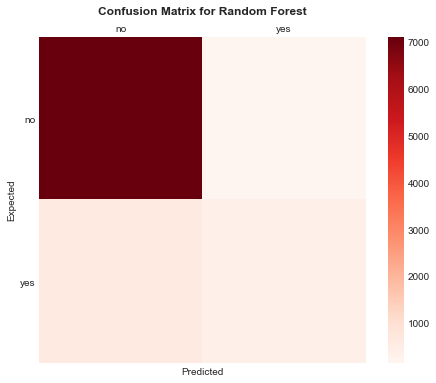

The precision is: 71.92 %
The recall is: 39.03 %


array([[7117,  148],
       [ 592,  379]], dtype=int64)

In [67]:
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=rf_grid_search, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=rf_y_pred, plot_confusion_matrix=True, figsize=(8,6))

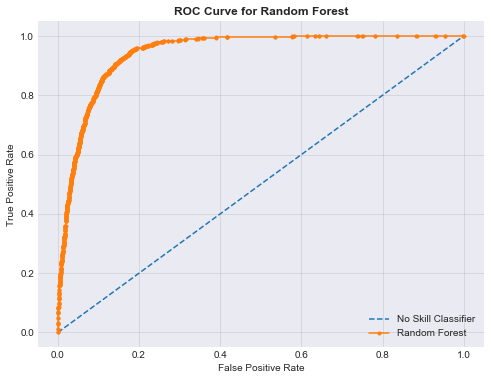

Random Forest - ROC AUC score: 0.9443


0.9443

In [76]:
# Evaluate the model by using ROC Curve:
createROCAnalysis(classifier=rf_grid_search, model_name='Random Forest', y_test=y_test, pred_probs=rf_pred_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

 Random Forest results:
 
 - The classifier was very good at predicting clients who are not going to subscribe
 - Not as successful for the clients who subscribed for the product
 - Still achieved a very good ROC -AUC score


##### Feature Importance

One good aspect of the Random Forest classifier, is that it's giving us the ability to observe which features were the most important when predicting the target variable. As presented in the sklearn documentation: *"The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance**."*

In [78]:
# Find the feature importance based on Gini criterion
feature_importance = {}
best_estimator_fi = rf_grid_search.best_estimator_.feature_importances_

for feature, importance in zip(X_train.columns, best_estimator_fi):
    feature_importance[feature] = importance

importances = pd.DataFrame.from_dict(feature_importance, orient='index').rename(columns={0: 'Gini Score'})

importances = importances.sort_values(by='Gini Score', ascending=False)

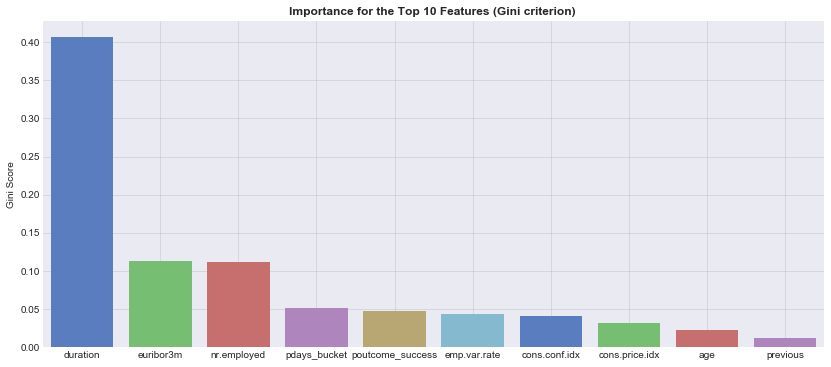

In [82]:
# Plot for feature importance
plt.figure(figsize=(14, 6))
sns.barplot(x=importances.index[0:10],
            y=importances['Gini Score'].iloc[0:10], palette='muted')
plt.title(f'Importance for the Top 10 Features (Gini criterion) ',
          fontweight='bold')
plt.grid(True, alpha=0.1, color='black')
plt.show()

Based on the plot above we can infer that:

- $duration$: Great predictor, but as a variable only useful after the call is finished – so we already know the outcome

- $emp.var.rate$, $cons.price.idx$, $euribor3m$, $nr.employed$: highly correlated, so we will use only one of them ($euribor3m$)

Other important variables that appear to be strong predictors: $age$, $pdays\_bucket$, $campaign$, $poutcome$

Thus we will construct our next model by using only these 5 variables and compare it's performance with the full model.

In [35]:
# Pick only the 5 variables for the second model
pout_ls = [col for col in X_train.columns if col.startswith('poutcome')]
five_features_ls = ['nr.employed', 'age', 'pdays_bucket', 'campaign'] + pout_ls
X_train_reduced = X_train[five_features_ls]
X_test_reduced = X_test[five_features_ls]

## Logistic Regression

Logistic regression is one of the most used machine learning classification algorithms, especially when we are facing a problem where the output variable (target) is binary (e.g. yes/no, spam/not spame, etc). The algorithm contains the word logistic, because it makes use of the logistic function - also known as sigmoid function:
$$S(x)={\frac {1}{1+e^{-x}}}$$

The name also contains the word regression, something that shouldn't confuse us as Logistic Regression is being used only for classification problems. This happens likely due to the fact that the algorithm is an 'extension' of linear regression but for classification tasks (remember that regression problems try to predict continuous values and not classes). Similar to linear regression the input values are combined linearly and then they become the input ($x$) of the sigmoid function presented above.This time the output is being "squeezed" to take a value between 0 and 1. In some sense, it's safe to say that this output it's a mapping between predicted values to probabilities.

Now remember that the term $x$ above will have a format similar to the linear regression, so we can re-write the signmoid function as below:
    $$S(x)={\frac {1}{1+e^{-(wx+b)}}}$$
    
The logistic regression algorithm is trying to optimize the values of $w$ and $b$, something that usually happens via maximizing the likelihood of the training data but it's out of the scope of this project.

Pros:
1. Works well when the feature space (# of variables) is small
2. High interpretability and easy to implement

Cons:
1. Easy to get outperformed from more complex algorithms
2. Relies a lot on the input variables (i.e. works well only with good predictors)

In [37]:
# Instantiate the Logistic Regression Model
log_reg = LogisticRegression()

We can set the parameter grid for tuning, similar to what we did for the random forest. The Logistic Regression algorithm is being tuned for the following parameters:
- __C__: Inverse of regularization strength
- __class_weight__: Handles the imbalance issue of the dataset, as it assigns different weight for the classes

In [38]:
bal_w = ['balanced', {0: 1, 1: 9.0}, {0: 0.1, 1: 1.0}]

param_grid = {
    'solver': ['lbfgs', 'saga', 'sag'],
    'C': np.arange(0.1, 20.1, 0.1),
    'penalty': ['l2'],
    'class_weight': bal_w
}

In [39]:
# Tune the model by finding the best hyperparameters
logreg_grid_search = GridSearchCV(estimator=log_reg, scoring=['roc_auc'],
                                  refit='roc_auc', param_grid=param_grid,
                                  cv=10, n_jobs=-1, verbose=10)

In [ ]:
# Fit the model and find the optimal parameters
logreg_grid_search.fit(X_train_reduced, y_train)

We can observe which were the best hyperparameters used for the Logistic Regression model:

In [41]:
logreg_grid_search.best_estimator_

LogisticRegression(C=4.2, class_weight={0: 1, 1: 9.0}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [42]:
logreg_pred_probs = logreg_grid_search.predict_proba(X_test_reduced)

In [43]:
# Assign the above probabilities to the corresponding class ('no', 'yes')
logreg_y_pred = logreg_grid_search.predict(X_test_reduced)

And finally we can evaluate the model's performance and visualize the results, similar to what we did for the Random Forests algorithm.

Confusion matrix:

 [[5243 2022]
 [ 287  684]]


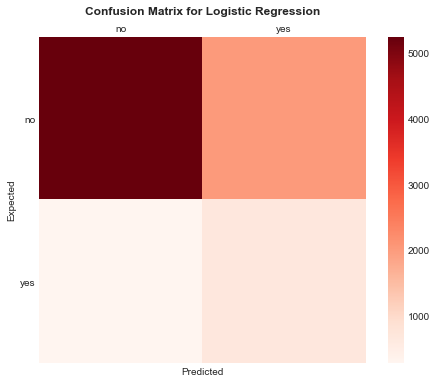

The precision is: 25.28 %
The recall is: 70.44 %


array([[5243, 2022],
       [ 287,  684]], dtype=int64)

In [44]:
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=logreg_grid_search, model_name='Logistic Regression', x_test=X_test_reduced,
                              y_test=y_test, y_predicted=logreg_y_pred, plot_confusion_matrix=True, figsize=(8,6))

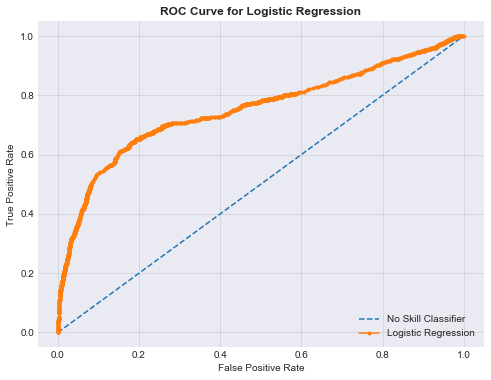

Logistic Regression - ROC AUC score: 0.7529


0.7529

In [45]:
# Evaluate the model by using ROC Curve:
createROCAnalysis(classifier=logreg_grid_search, model_name='Logistic Regression', y_test=y_test,
                  pred_probs=logreg_pred_probs, plot_ROC_Curve=True, figsize=(8,6))

Logistic Regression results:
 
- The classifier  -overall- performed worse than the initial classifier, where we used all 20 predictor variables.
- This model performed better at capturing the minority class (i.e. clients who subscribed)
- Made more mistakes compared to Model A by classifying clients who did not subscribe as ‘subscribed’


## Part 5 - Model Comparison and Final Thoughts

At this final part of this project, we will focus on comparing the two classification algorithms output. We can summarize our observations as presented below:

1. Random Forest with the whole set of features performed better at predicting clients who will not subscribe for the product

2. The dataset is small in size and we can leverage the power of Random Forests (Model A), but we have to remove variables like ‘duration’, as they are unrealistic for a real-world scenario

3. Logistic Regression (5 features) was successful at capturing some of the cases where clients did subscribe, but was more prompt at classifying client who did not intend to subscribe as ‘subscribed’

4. Logistic Regression (Model B) contains only a subset of the values, and thus we are losing important information that we can not capture with only 5 features

From the above we can infer that, if a data scientist/analyst cares equally about predicting accurately both classes then he/she should go with the random forest algorithm.On the other hand, if our business purpose is to accurately identify as many ‘subscribed’ clients as possible, then we should pick the logistic regression model.



Some ideas for further research in future iteration of the project:
    
- Use imputation methods for the columns that have ‘unknown’ values

- Try dimensionality reduction techniques (e.g. for the socioeconomics features that were highly correlated)

- Test different/more complex types of classifiers

- Evaluate the performance of other models that are using other set of variables, different from the five used for Model B
